<a href="https://colab.research.google.com/github/Learnheart/URL-Classification/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit_learn==1.4.1.post1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: scikit_learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# pip install --upgrade scikit-learn
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras import layers, models
from keras.callbacks import EarlyStopping
from keras.layers import MaxPooling1D
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

!pip3 install pyvi
from pyvi import ViUtils
from tensorflow.keras.utils import plot_model


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
names=['URL','Category']
df = pd.read_csv('/content/drive/MyDrive/NCKH/Data/full training data.csv',names=names, usecols=[0,2],na_filter=False, encoding='latin-1')
print(df.shape)
df.tail(10)

(379119, 2)


,URL,Category
379109,https://tainguyenvamoitruong.vn/cong-bo-ket-qu...,Environment
379110,https://tainguyenvamoitruong.vn/de-xuat-lap-sa...,Environment
379111,https://tainguyenvamoitruong.vn/chu-dong-kiem-...,Environment
379112,https://tainguyenvamoitruong.vn/hai-duong-tran...,Environment
379113,https://tainguyenvamoitruong.vn/hoan-thien-khu...,Environment
379114,https://tainguyenvamoitruong.vn/hanh-vi-xa-rac...,Environment
379115,https://tainguyenvamoitruong.vn/vinh-phuc-lay-...,Environment
379116,https://tainguyenvamoitruong.vn/tim-ra-nguyen-...,Environment
379117,https://tainguyenvamoitruong.vn/bac-bo-va-bac-...,Environment
379118,https://tainguyenvamoitruong.vn/trang-trai-nuo...,Environment


In [ ]:
def url_to_text(url):
  # remove stopwords
  url = url.replace('.html','').replace('.htm','').replace('http://','').replace('https://','')
  url = re.sub('^(.*?/)','/', url) # remove domains
  url = re.sub('[0-9]+', '', url)
  url = re.sub('[_\-/]+', ' ', url)

  return ViUtils.remove_accents(url.lower()).decode()

df['URL'] = df['URL'].apply(url_to_text)

dataset = df[:]
train, test = train_test_split(dataset, random_state=33, test_size=0.1)
train, val = train_test_split(train, random_state=44, test_size=0.2)
train.tail()
val.tail()
test.tail()

,URL,Category
205946,giai ma con giap khong can than la de mac han...,Science & Technology
141599,am thuc ngon quen sau voi thit ngam vi huong ...,Food & Drink
151951,bun dau hang khay co tuyen,Food & Drink
45137,tai lieu hoan thien nghiep vu tu van xac dinh...,Business & Finance
355610,en g the walking merge,Games


#Visualize data

In [ ]:
unique_names = df['Category'].unique()
print("Unique names in the column:", unique_names)

Unique names in the column: ['Automotive' 'Books & Literature' 'Business & Finance' 'Careers'
 'Education' 'Entertainment & Art' 'Family & Relationships' 'Food & Drink'
 'Healthy Living' 'Home & Garden' 'News & Politics' 'Science & Technology'
 'Sports' 'Style & Fashion' 'Travel' 'Real Estate' 'Games'
 'Laws & Policies' 'Environment']


(379119, 2)

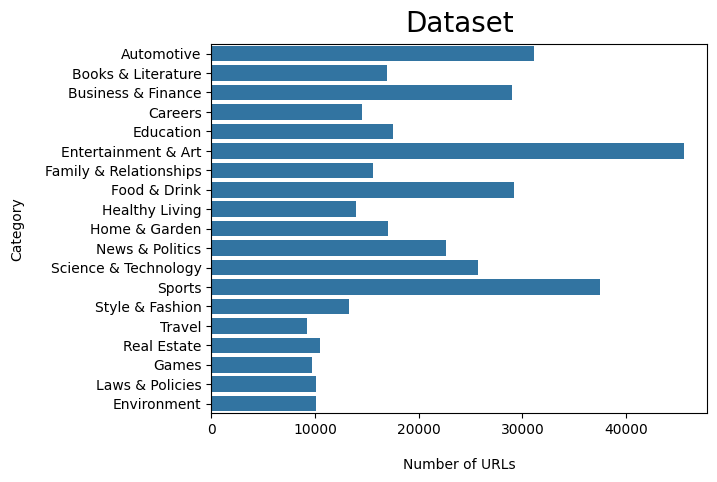

In [ ]:
import seaborn as sns
ax = sns.countplot(y="Category", data=dataset, order= ['Automotive', 'Books & Literature', 'Business & Finance', 'Careers',
 'Education', 'Entertainment & Art', 'Family & Relationships', 'Food & Drink',
 'Healthy Living', 'Home & Garden', 'News & Politics', 'Science & Technology',
 'Sports', 'Style & Fashion', 'Travel', 'Real Estate', 'Games',
 'Laws & Policies', 'Environment'])
plt.title("Dataset", y=1.01, fontsize=20)
plt.ylabel("Category", labelpad=15)
plt.xlabel("Number of URLs",labelpad=15)
df.shape

Text(0.5, 0, 'Number of URLs')

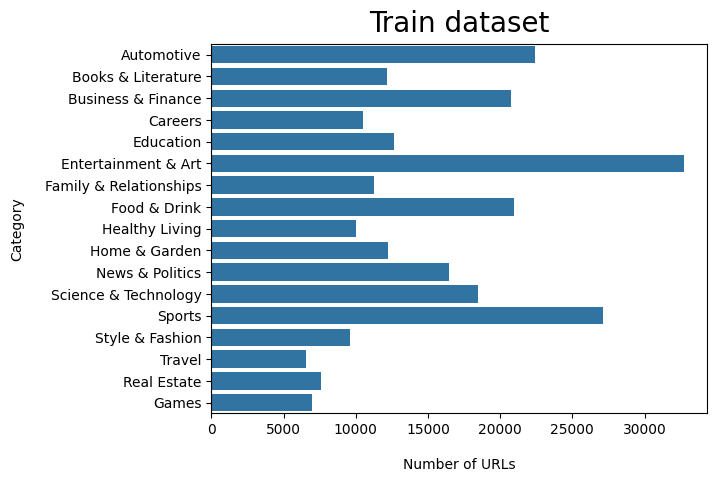

In [ ]:
ax = sns.countplot(y="Category",  data=train, order=['Automotive', 'Books & Literature', 'Business & Finance', 'Careers',
 'Education', 'Entertainment & Art', 'Family & Relationships', 'Food & Drink',
 'Healthy Living', 'Home & Garden', 'News & Politics', 'Science & Technology',
 'Sports', 'Style & Fashion', 'Travel', 'Real Estate', 'Games',])
plt.title("Train dataset", y=1.01, fontsize=20)
plt.ylabel("Category", labelpad=15)
plt.xlabel("Number of URLs", labelpad=15)

Text(0.5, 0, 'Number of URLs')

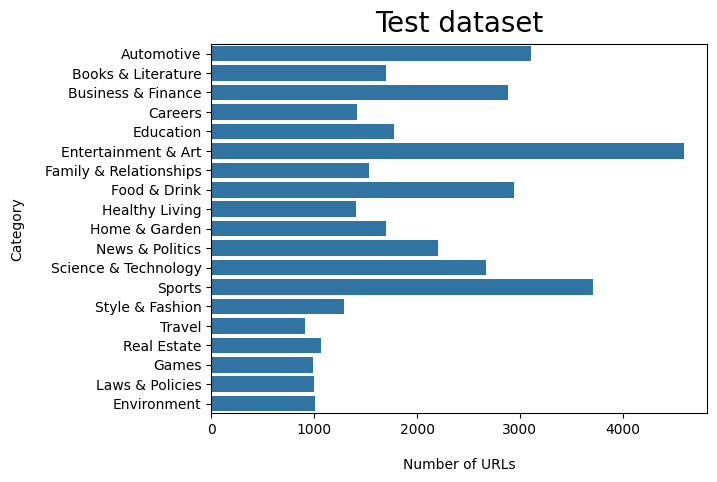

In [ ]:
ax = sns.countplot(y = "Category",  data = test, order=['Automotive', 'Books & Literature', 'Business & Finance', 'Careers',
 'Education', 'Entertainment & Art', 'Family & Relationships', 'Food & Drink',
 'Healthy Living', 'Home & Garden', 'News & Politics', 'Science & Technology',
 'Sports', 'Style & Fashion', 'Travel', 'Real Estate', 'Games',
 'Laws & Policies', 'Environment',])
plt.title("Test dataset", y=1.01, fontsize=20)
plt.ylabel("Category", labelpad=15)
plt.xlabel("Number of URLs", labelpad=15)

In [ ]:
x_train=train['URL']
y_train=train['Category']
print( 'Train shape' , train.shape)

x_val=val['URL']
y_val=val['Category']
print( 'Val shape' , val.shape)

x_test=test['URL']
y_test=test['Category']
print( 'Test shape' , test.shape)

Train shape (272965, 2)
Val shape (68242, 2)
Test shape (37912, 2)


#Origin model

In [ ]:
import re
from sklearn.pipeline import Pipeline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

stemmed_count_vect = StemmedCountVectorizer(stop_words='english', ngram_range=(3,3))
gs_clf = Pipeline([('vect', stemmed_count_vect),
                   ('tfidf', TfidfTransformer()),
                   ('clf', SGDClassifier(loss='perceptron', penalty='l2',
                    alpha =1e-4 , max_iter=20 ,tol=None)),
   ])
gs_clf = gs_clf.fit(x_train, y_train)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
y_pred=gs_clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 4))

                        precision    recall  f1-score   support

            Automotive     0.9580    0.8510    0.9013      3108
    Books & Literature     0.9716    0.8873    0.9275      1695
    Business & Finance     0.9377    0.9338    0.9358      2887
               Careers     0.4242    0.9823    0.5925      1415
             Education     0.9887    0.9876    0.9881      1772
   Entertainment & Art     0.9648    0.9369    0.9506      4593
           Environment     0.8720    0.8006    0.8348      1013
Family & Relationships     0.9529    0.9261    0.9393      1530
          Food & Drink     0.9387    0.7492    0.8333      2943
                 Games     0.8360    0.7307    0.7798       984
        Healthy Living     0.9285    0.9041    0.9161      1407
         Home & Garden     0.9557    0.9501    0.9529      1702
       Laws & Policies     0.8905    0.9317    0.9106       995
       News & Politics     0.9521    0.9210    0.9363      2203
           Real Estate     0.9312    0.

In [ ]:
new_input_url = 'https://vnexpress.net/loat-phim-ra-rap-thang-3-4431567.html'
new_input_processed = url_to_text(new_input_url)

# Make prediction for the new input
prediction_encoded = gs_clf.predict([new_input_processed])

print("Predicted Class:", prediction_encoded)

Predicted Class: ['Careers']


#Hyperparameter

In [ ]:
import re
from sklearn.pipeline import Pipeline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

stemmed_count_vect = StemmedCountVectorizer(stop_words='english', ngram_range=(3,3))
gs_clf = Pipeline([('vect', stemmed_count_vect),
                   ('tfidf', TfidfTransformer()),
                   ('clf', SGDClassifier(loss='perceptron', penalty='l2',
                    alpha =1e-4 , max_iter=20 ,tol=None)),
   ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.model_selection import GridSearchCV
import logging

# Define parameter grid appropriate for SGDClassifier
param_grid = {'clf__alpha': [0.001, 0.01, 0.1],
              'clf__max_iter': [50, 100, 200]}


grid = GridSearchCV(gs_clf, param_grid, refit=True, verbose=3)

logging.basicConfig(level=logging.INFO)
logging.info("Grid search started...")

grid.fit(x_train, y_train)

# Log when grid search completes
logging.info("Grid search completed.")

# Accessing cross-validated scores
cv_results = grid.cv_results_
mean_test_scores = cv_results['mean_test_score']
params = cv_results['params']

# Logging progress
for mean_score, params in zip(mean_test_scores, params):
    logging.info("Mean Test Score: %f", mean_score)
    logging.info("Hyperparameters: %s", params)


for mean_score, params in zip(mean_test_scores, params):
    print("Mean test score: ", mean_score)
    print("Hyperparameter", params)
    print("-------------------")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END clf__alpha=0.001, clf__max_iter=50;, score=0.896 total time= 3.3min
[CV 2/5] END clf__alpha=0.001, clf__max_iter=50;, score=0.893 total time= 3.4min
[CV 3/5] END clf__alpha=0.001, clf__max_iter=50;, score=0.896 total time= 3.5min
[CV 4/5] END clf__alpha=0.001, clf__max_iter=50;, score=0.877 total time= 3.4min
[CV 5/5] END clf__alpha=0.001, clf__max_iter=50;, score=0.895 total time= 3.5min
[CV 1/5] END clf__alpha=0.001, clf__max_iter=100;, score=0.879 total time= 5.3min
[CV 2/5] END clf__alpha=0.001, clf__max_iter=100;, score=0.879 total time= 5.3min
[CV 3/5] END clf__alpha=0.001, clf__max_iter=100;, score=0.877 total time= 5.3min
[CV 4/5] END clf__alpha=0.001, clf__max_iter=100;, score=0.893 total time= 5.0min
[CV 5/5] END clf__alpha=0.001, clf__max_iter=100;, score=0.894 total time= 5.1min
[CV 1/5] END clf__alpha=0.001, clf__max_iter=200;, score=0.897 total time= 8.8min
[CV 2/5] END clf__alpha=0.001, clf__max_ite

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
grid_svc = grid.predict(x_test)
accuracy_score(y_test,grid_svc)
print(classification_report(y_test,grid_svc))

                        precision    recall  f1-score   support

            Automotive       0.55      0.97      0.70      3108
    Books & Literature       0.98      0.88      0.93      1695
    Business & Finance       0.94      0.93      0.93      2887
               Careers       0.98      0.34      0.50      1415
             Education       0.95      0.99      0.97      1772
   Entertainment & Art       0.97      0.94      0.95      4593
           Environment       0.87      0.79      0.83      1013
Family & Relationships       0.95      0.93      0.94      1530
          Food & Drink       0.94      0.75      0.84      2943
                 Games       0.95      0.73      0.83       984
        Healthy Living       0.94      0.90      0.92      1407
         Home & Garden       0.93      0.96      0.94      1702
       Laws & Policies       0.86      0.93      0.90       995
       News & Politics       0.95      0.92      0.93      2203
           Real Estate       0.91      

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'clf__alpha': 0.001, 'clf__max_iter': 50}
{'memory': None, 'steps': [('vect', StemmedCountVectorizer(ngram_range=(3, 3), stop_words='english')), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(alpha=0.001, loss='perceptron', max_iter=50, tol=None))], 'verbose': False, 'vect': StemmedCountVectorizer(ngram_range=(3, 3), stop_words='english'), 'tfidf': TfidfTransformer(), 'clf': SGDClassifier(alpha=0.001, loss='perceptron', max_iter=50, tol=None), 'vect__analyzer': 'word', 'vect__binary': False, 'vect__decode_error': 'strict', 'vect__dtype': <class 'numpy.int64'>, 'vect__encoding': 'utf-8', 'vect__input': 'content', 'vect__lowercase': True, 'vect__max_df': 1.0, 'vect__max_features': None, 'vect__min_df': 1, 'vect__ngram_range': (3, 3), 'vect__preprocessor': None, 'vect__stop_words': 'english', 'vect__strip_accents': None, 'vect__token_pattern': '(?u)\\b\\w\\w+\\b', 'vect__tokenizer': None, 'vect__vocabulary': None, 'tfidf__norm': 'l2', 'tfidf__smooth_idf': True, 'tfidf__sublinear_tf

In [ ]:
new_input_url = 'https://vnexpress.net/loat-phim-ra-rap-thang-3-4431567.html'
new_input_processed = url_to_text(new_input_url)

# Make prediction for the new input
prediction_encoded = grid.predict([new_input_processed])

print("Predicted Class:", prediction_encoded)

Predicted Class: ['Automotive']


In [ ]:
import joblib

# Save the best model to a file
joblib.dump(gs_clf, '/content/drive/MyDrive/NCKH/HyperModel/origin_svm_1.4.1.pkl')

['/content/drive/MyDrive/NCKH/HyperModel/origin_svm_1.4.1.pkl']